### Question 3 - Crypto vs stocks: Volume and Returns - Do they correlate?

In [922]:
# Imports

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import numpy_financial as npf
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [338]:
# Load .env environment variables

import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
load_dotenv()

True

In [938]:
# Read the csv on cryptocurrency
    
BTC_df= pd.read_csv(Path('Resources/coin_Bitcoin.csv'))
ETH_df= pd.read_csv(Path('Resources/coin_Ethereum.csv'))
LTE_df= pd.read_csv(Path('Resources/coin_Litecoin.csv'))
XRP_df= pd.read_csv(Path('Resources/coin_XRP.csv'))


In [939]:
# Create new Df's for close prices of each cryptocurrency

BTC_close_df=BTC_df[['Date','Close']].set_index('Date')
ETH_close_df=ETH_df[['Date','Close']].set_index('Date')
LTE_close_df=LTE_df[['Date','Close']].set_index('Date')
XRP_close_df=XRP_df[['Date','Close']].set_index('Date')

# Volume DF

BTC_vol_df=BTC_df[['Date','Volume']].set_index('Date')
ETH_vol_df=ETH_df[['Date','Volume']].set_index('Date')
LTE_vol_df=LTE_df[['Date','Volume']].set_index('Date')
XRP_vol_df=XRP_df[['Date','Volume']].set_index('Date')

# concat close and vol df's into one

crypto_close=pd.concat([BTC_close_df, ETH_close_df,LTE_close_df,XRP_close_df], axis=1, join='inner')
crypto_close.sort_index(inplace=True)
crypto_close.reset_index(inplace=True)
crypto_close.columns=['Date','BTC','ETH','LTE','XRP']
crypto_close.set_index=['Date']

crypto_vol=pd.concat([BTC_vol_df, ETH_vol_df,LTE_vol_df,XRP_vol_df], axis=1, join='inner')
crypto_vol.sort_index(inplace=True)
crypto_vol.reset_index(inplace=True)
crypto_vol.columns=['Date','BTC','ETH','LTE','XRP']
crypto_vol.set_index=['Date']
       

In [792]:
# convert string on crypto close

for i in range(len(crypto_close)):
    date_str = crypto_close.Date[i]
    format_str = '%Y-%m-%d'
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    crypto_close.Date[i] = datetime_obj
    
crypto_close=crypto_close.set_index('Date')

In [796]:
#convert string on crypto volume

for i in range(len(crypto_vol)):
    date_str = crypto_vol.Date[i]
    format_str = '%Y-%m-%d'
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    crypto_vol.Date[i] = datetime_obj
    
crypto_vol=crypto_vol.set_index('Date')

In [801]:
# Calculate Returns for crypto close and volume

crypto_close_rtn=(crypto_close.pct_change()+1).cumprod().dropna()
crypto_vol_rtn=(crypto_vol.pct_change()+1).cumprod().dropna()


In [802]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [803]:
# Grab tickers for indicies
ticker = ["DIA","SPY","IWM","GLD"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes
start = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-02-27", tz="America/New_York").isoformat()


df_etf_ticker=alpaca.get_barset(ticker,timeframe,start=start,end=end,limit=1000).df

In [877]:
# DF on closing px

df_close_px=pd.DataFrame()
df_close_px["DIA"]=df_etf_ticker["DIA"]["close"]
df_close_px["SPY"]=df_etf_ticker["SPY"]["close"]
df_close_px["IWM"]=df_etf_ticker["IWM"]["close"]
df_close_px["GLD"]=df_etf_ticker["GLD"]["close"]
df_close_px.index=df_close_px.index.date

# DF on Vol

df_vol=pd.DataFrame()
df_vol["DIA"]=df_etf_ticker["DIA"]["volume"]
df_vol["SPY"]=df_etf_ticker["SPY"]["volume"]
df_vol["IWM"]=df_etf_ticker["IWM"]["volume"]
df_vol["GLD"]=df_etf_ticker["GLD"]["volume"]
df_vol.index=df_vol.index.date


In [805]:
# Compute daily returns for DF close

df_etf_returns=(df_close_px.pct_change()+1).cumprod().dropna()
df_vol_returns=(df_vol.pct_change().dropna()+1).cumprod().dropna()


In [941]:
# Combine Return data into one data frame for close returns and volume

combined_returns_df=pd.concat([crypto_close_rtn,df_etf_returns], axis=1, join='inner').dropna()
combined_returns_df.sort_index(inplace=True)
combined_returns_df.reset_index(inplace=True)
combined_returns_df.columns=['Date','BTC','ETH','LTE','XRP','DIA','SPY','IWM','GLD']
combined_returns_df.set_index=['Date']

combined_vol_df=pd.concat([crypto_vol_rtn,df_vol_returns], axis=1, join='inner').dropna()
combined_vol_df.sort_index(inplace=True)
combined_vol_df.reset_index(inplace=True)
combined_vol_df.columns=['Date','BTC','ETH','LTE','XRP','DIA','SPY','IWM','GLD']
combined_vol_df.set_index=['Date']

combined_returns_df.to_csv('combined_returns_df')
combined_vol_df.to_csv('combined_vol_df.csv')

In [951]:
# Calculate the Correlation of the combined crypto and stock returns

corr_rtn=combined_returns_df.corr()
corr_rtn

,BTC,ETH,LTE,XRP,DIA,SPY,IWM,GLD
BTC,1.000000,0.815213,0.552186,0.201994,0.688144,0.761289,0.768740,0.570067
ETH,0.815213,1.000000,0.773096,0.548988,0.403574,0.440365,0.670076,0.260962
LTE,0.552186,0.773096,1.000000,0.738037,0.284193,0.192764,0.429802,-0.013844
XRP,0.201994,0.548988,0.738037,1.000000,0.104240,-0.018010,0.196505,-0.171111
DIA,0.688144,0.403574,0.284193,0.104240,1.000000,0.942915,0.771883,0.610703
SPY,0.761289,0.440365,0.192764,-0.018010,0.942915,1.000000,0.733743,0.800727
IWM,0.768740,0.670076,0.429802,0.196505,0.771883,0.733743,1.000000,0.270318
GLD,0.570067,0.260962,-0.013844,-0.171111,0.610703,0.800727,0.270318,1.000000


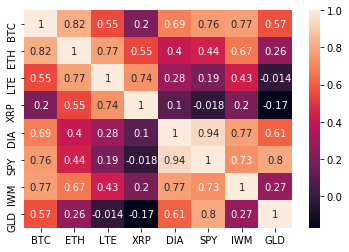

In [962]:
# Plot combined returns correlation

sns.heatmap(corr_rtn, annot=True)

In [946]:
corr_rtn.hvplot(title='Returns Correlation',xlabel='Ticker',ylabel='Correlation')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [901]:
# Calculate the Correlation of the combined crypto and stock volume

corr_vol=combined_vol_df.corr()
corr_vol

,BTC,ETH,LTE,XRP,DIA,SPY,IWM,GLD
BTC,1.000000,0.865277,0.811636,0.575241,0.230731,0.225241,0.331042,0.284160
ETH,0.865277,1.000000,0.879469,0.617679,0.187019,0.205826,0.304444,0.293560
LTE,0.811636,0.879469,1.000000,0.694832,0.099335,0.104497,0.197132,0.229135
XRP,0.575241,0.617679,0.694832,1.000000,0.013288,0.005286,0.063043,0.133281
DIA,0.230731,0.187019,0.099335,0.013288,1.000000,0.853582,0.855975,0.384685
SPY,0.225241,0.205826,0.104497,0.005286,0.853582,1.000000,0.738637,0.492934
IWM,0.331042,0.304444,0.197132,0.063043,0.855975,0.738637,1.000000,0.424623
GLD,0.284160,0.293560,0.229135,0.133281,0.384685,0.492934,0.424623,1.000000


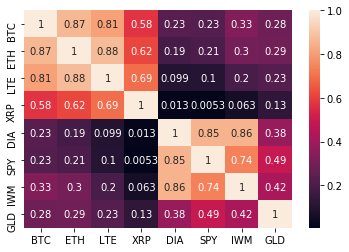

In [963]:
# Plot the correlation of stock and crypto volume

sns.heatmap(corr_vol, annot=True)

In [947]:
corr_vol.hvplot(title='Volume Correlation',xlabel='Ticker',ylabel='Correlation')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

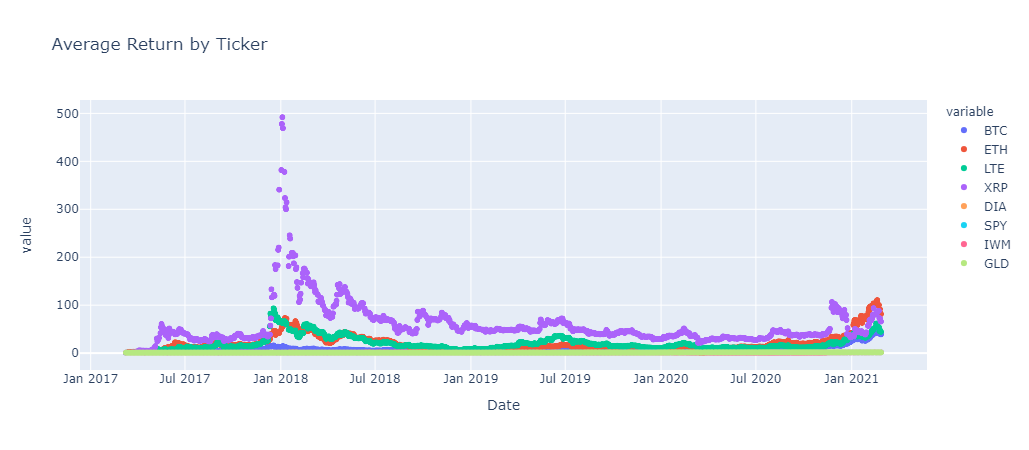

In [953]:
# Plot combined returns

px.scatter(combined_returns_df, x = "Date", y = ['BTC','ETH','LTE','XRP','DIA','SPY','IWM','GLD'], title='Average Return by Ticker')  

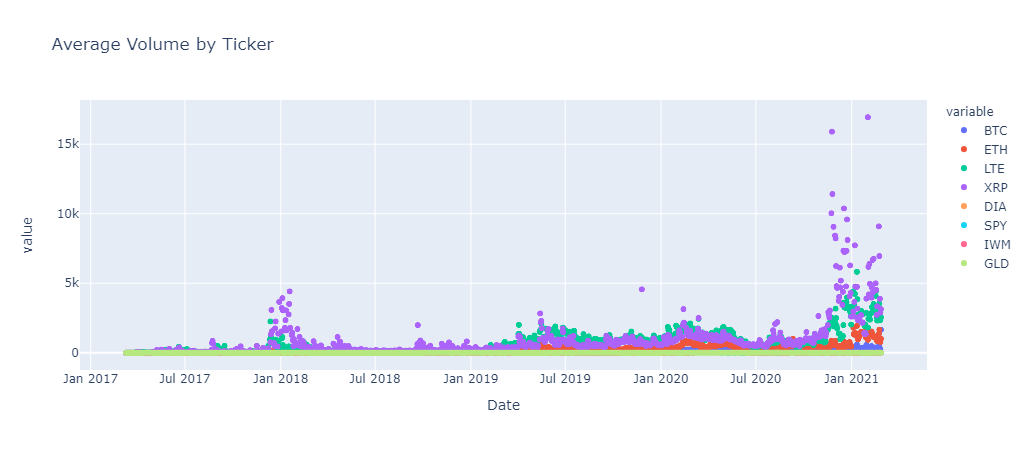

In [954]:
# Plot combined vol

px.scatter(combined_vol_df, x = "Date", y = ['BTC','ETH','LTE','XRP','DIA','SPY','IWM','GLD'],title='Average Volume by Ticker')  

# Simulated Returns on initial investment of $10,000

In [966]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl=round(initial_investment*combined_df,2)

# Display sample data
cumulative_pnl.tail()

,BTC,ETH,LTE,XRP,DIA,SPY,IWM,GLD
Date,,,,,,,,
2021-02-22,456102.45,1003673.96,542167.87,879856.25,15105.66,16346.17,16359.78,14807.34
2021-02-23,410810.59,884387.77,460957.68,728768.61,15111.89,16362.64,16214.99,14776.76
2021-02-24,418222.57,916138.11,472534.29,726104.64,15308.83,16542.52,16601.10,14764.53
2021-02-25,396249.47,831162.32,466082.00,668691.16,15046.72,16146.86,15978.79,14488.42
2021-02-26,389904.50,814451.20,443927.86,658498.44,14827.26,16059.45,15964.17,14137.18


In [964]:
cumulative_pnl.hvplot(figsize=(20,10), title='Simulated Daily Returns of a $10,000 investment').opts(yformatter='%.0f')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [751]:
total_rtn=cumulative_pnl.iloc[-1]

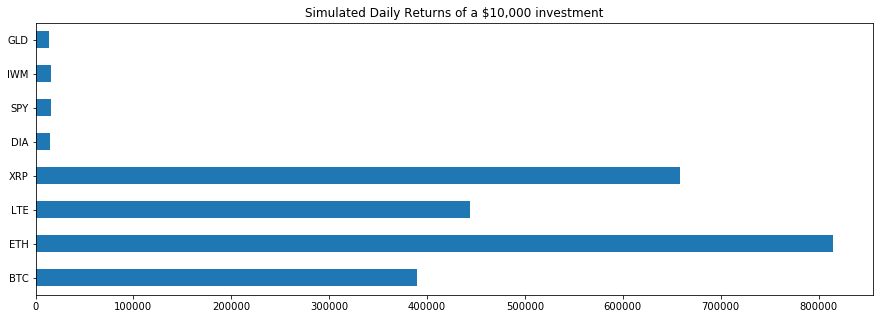

In [935]:
#plot total ROI

total_rtn.plot.barh(figsize=(15,5), title='Simulated Daily Returns of a $10,000 investment', stacked=True)

In [753]:
# Return on investment in each asset

print(f"If you invested $10,000 on March 9th, 2017, your investment today would be worth:")
print(f"--------------------")
for i in ['BTC', 'ETH', 'LTE','XRP','DIA','SPY','IWM','GLD']:
    print(i + " " + str(total_rtn[i]))

If you invested $10,000 on March 9th, 2017, your investment today would be worth:
--------------------
BTC 389904.5
ETH 814451.2
LTE 443927.86
XRP 658498.44
DIA 14827.26
SPY 16059.45
IWM 15964.17
GLD 14137.18
